# Week 5 handin

## Assignment

### Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
### Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

## Status
Everything is done.

## Solution part 1

In [2]:
#1.-4.
import pandas as pd
a_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2020K4&CIVILSTAND=F', sep=';')
b_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=TOT%2CU&Tid=2020K4', sep=';')
c_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&CIVILSTAND=G&Tid=*', sep=';')
d_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&Tid=2020K4&ALDER=*', sep=';')
print(a_data)
#print(b_data)
#print(c_data)
#print(d_data)

      TID CIVILSTAND  INDHOLD
0  2008K1   Fraskilt   428864
1  2020K4   Fraskilt   552419


In [33]:
#5.A.
divorced_before = a_data.iloc[0,2]
divorced_before_time = a_data.iloc[0,0]

divorced_after = a_data.iloc[1,2]
divorced_after_time = a_data.iloc[1,0]

divorced_change_proc = round(((divorced_after/divorced_before)-1)*100,2)

change_type = 'increased' if divorced_change_proc >= 0 else 'decreased'
message = ('The amount of divorced people has ' + change_type + ' by ' + str(divorced_change_proc) 
           + '% from ' + divorced_before_time + ' to ' + divorced_after_time)

print(message)

The amount of divorced people has increased by 28.81% from 2008K1 to 2020K4


In [47]:
#5.B.
#Masks
mask_not_country = (b_data[:]['OMRÅDE'] != 'Hele landet')
mask_not_region = (b_data[:]['OMRÅDE'].str.contains('Region') == False)
mask_not_city = mask_not_country & mask_not_region

mask_all_status = (b_data[:]['CIVILSTAND'] == 'I alt')
mask_unmarried_status = (b_data[:]['CIVILSTAND'] == 'Ugift')

b_filtered_all_data = b_data[mask_not_city & mask_all_status]
five_largest = b_filtered_all_data.sort_values('INDHOLD', ascending=False)[:5]

b_filtered_unmarried_data = b_data[mask_not_city & mask_unmarried_status]
five_largest_unmarried = b_filtered_unmarried_data.sort_values('INDHOLD', ascending=False)[:5]

highest = {'area':'Nowhere', 'proc':0}

for area in five_largest['OMRÅDE']:
    full_amount = int(five_largest[(five_largest[:]['OMRÅDE'] == area)]['INDHOLD'])
    unmarried_amount = int(b_data[mask_not_city & mask_unmarried_status & (b_data[:]['OMRÅDE'] == area)]['INDHOLD'])
    city_proc = round((unmarried_amount/full_amount)*100,2)
    if city_proc > highest['proc']:
        highest['area'] = area
        highest['proc'] = city_proc

print('Of the 5 biggest cities, ' + highest['area'] + ' has the largest unmarried rate, with ' + str(highest['proc']) + "%")

five_largest
#five_largest_unmarried


Of the 5 biggest cities, København has the largest unmarried rate, with 65.49%


,OMRÅDE,CIVILSTAND,TID,INDHOLD
4,København,I alt,2020K4,637936
168,Aarhus,I alt,2020K4,353445
208,Aalborg,I alt,2020K4,219310
116,Odense,I alt,2020K4,205881
142,Vejle,I alt,2020K4,116665


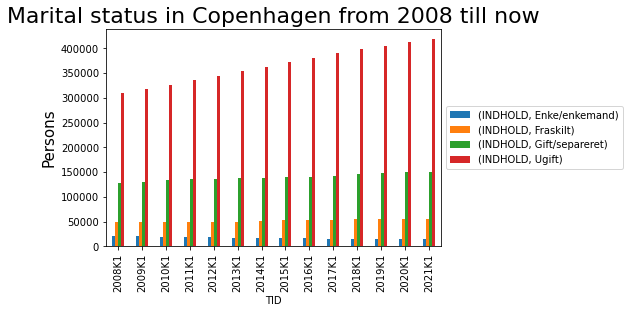

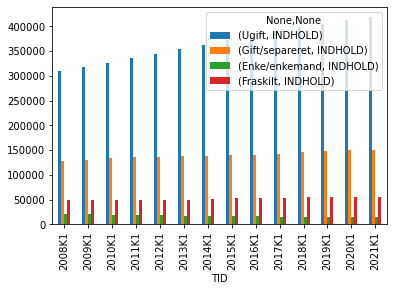

In [6]:
#5.C.
# import matplotlib.pyplot as plt
# %matplotlib inline

# all_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&Tid=*&OMR%C3%85DE=101&CIVILSTAND=U%2CG%2CE%2CF&ALDER=*', sep=';')
# smaller_data = all_data[(all_data[:]['TID'].str.contains('K1'))]
# married_data = all_data[(all_data[:]['CIVILSTAND'].str.contains('Gift')) & (all_data[:]['ALDER'] != 'I alt')].reset_index(drop=True)
# not_married_data = all_data[(all_data[:]['CIVILSTAND'].str.contains('Ugift')) & (all_data[:]['ALDER'] != 'I alt')].reset_index(drop=True)
# widow_data = all_data[(all_data[:]['CIVILSTAND'].str.contains('Enke')) & (all_data[:]['ALDER'] != 'I alt')].reset_index(drop=True)
# divorced_data = all_data[(all_data[:]['CIVILSTAND'].str.contains('Fraskilt')) & (all_data[:]['ALDER'] != 'I alt')].reset_index(drop=True)
# print(not_married_data)
# data = pd.concat([not_married_data, married_data, widow_data, divorced_data, smaller_data], axis=1, keys=['Not Married','Married', 'Widow', 'divorced'])


# all_data.plot(kind="bar", x='TID')

# plt.ylim(125000,155000)
# plt.show()

#Løsning 1
csv_data_3 = pd.read_csv("https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1&OMR%C3%85DE=101&CIVILSTAND=U%2CG%2CE%2CF", sep=";")
df = csv_data_3.groupby([ 'TID','CIVILSTAND']).mean().unstack()
ax = df.plot(kind='bar')
ax.set_title("Marital status in Copenhagen from 2008 till now", fontsize=22)
ax.set_ylabel("Persons", fontsize=15);
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Løsning 2
ugift = csv_data_3[csv_data_3['CIVILSTAND'].isin(["Ugift"])].reset_index(drop=True)
gift_separeret = csv_data_3[csv_data_3['CIVILSTAND'].isin(["Gift/separeret"])].reset_index(drop=True)
enke_enkemand = csv_data_3[csv_data_3['CIVILSTAND'].isin(["Enke/enkemand"])].reset_index(drop=True)
fraskilt = csv_data_3[csv_data_3['CIVILSTAND'].isin(["Fraskilt"])].reset_index(drop=True)
tid = ugift.loc[:]['TID']

data = pd.concat([ugift, gift_separeret,enke_enkemand,fraskilt], axis=1,keys=[ "Ugift", "Gift/separeret", "Enke/enkemand", "Fraskilt"])
data.index=tid
 
data.plot.bar()


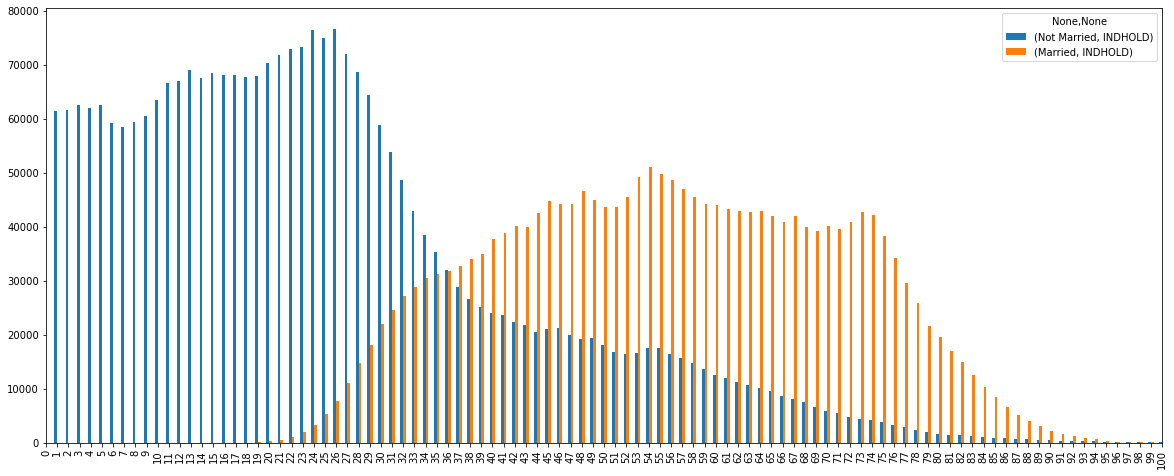

In [86]:
#5.D.
import matplotlib.pyplot as plt
d_data = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG&Tid=2020K4&ALDER=*', sep=';')
married_data = d_data[(d_data[:]['CIVILSTAND'].str.contains('Gift')) & (d_data[:]['ALDER'] != 'I alt')].reset_index(drop=True)
not_married_data = d_data[(d_data[:]['CIVILSTAND'].str.contains('Ugift')) & (d_data[:]['ALDER'] != 'I alt')]

data = pd.concat([not_married_data, married_data], axis=1, keys=['Not Married','Married'])

data.plot(kind="bar", figsize=(20,8))
plt.xlim(0,100)

plt.show()

## Solution part 2